# Introductory Machine Learning Pre-Class assignment 2 Predicting House Prices
## Name: Nguyen Anh Hoang Phuc

## Problem 1

In [1]:
import pandas as pd

In [2]:
pd_train = pd.read_csv('train.csv') 
data = pd_train[["GrLivArea","YearBuilt", "SalePrice"]]

In [3]:
data.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


## Problem 2

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = data.loc[:, ["GrLivArea","YearBuilt"]]
y = data["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

reg = LinearRegression().fit(X_train_trans, y_train)
reg_pred = reg.predict(X_test_trans)

from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_true=y_test, y_pred=reg_pred))

MSE: 2314465092.7320137


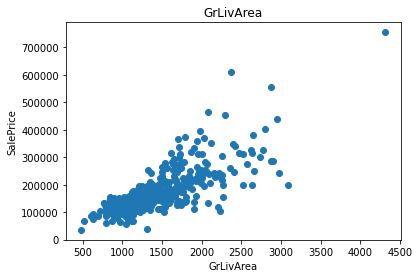

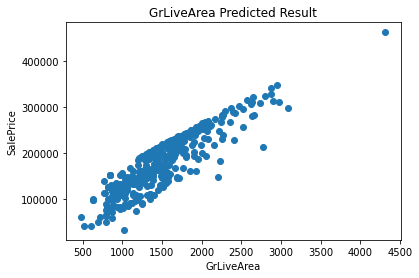

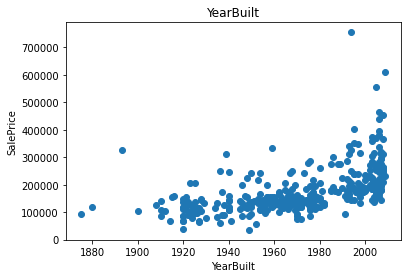

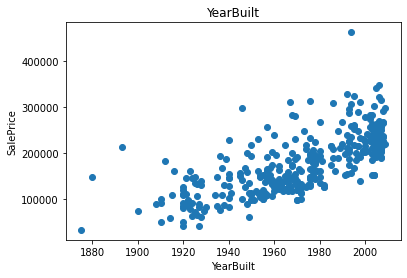

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X_test.loc[:, 'GrLivArea'], y_test, label='actual')
plt.title('GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:,'GrLivArea'],reg_pred, label='predicted')
plt.title('GrLiveArea Predicted Result')
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:, 'YearBuilt'], y_test, label='actual')
plt.title('YearBuilt')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

plt.scatter(X_test.loc[:, 'YearBuilt'], reg_pred, label='predicted')
plt.title('YearBuilt Predicted Result')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.show()

## Problem 3

In [16]:
mSE_results = []
model_names = []

def display_outputs(title,y_prediction):
    
    #we calculate the MSE
    mSE = mean_squared_error(y_true=y_test, y_pred=y_prediction)
    
    #and we add the results into a list
    mSE_results.append(mSE)
    model_names.append(title)

    # Then we Display the results
    print(title)
    print("MSE:", mSE)
    
    # here visualize the extrated data
    plt.scatter(X_test.loc[:, 'GrLivArea'], y_test, label='actual') 
    plt.title('GrLivArea') 
    plt.xlabel('GrLivArea') 
    plt.ylabel('SalePrice') 
    plt.show()
    
    plt.scatter(X_test.loc[:, 'GrLivArea'], y_prediction, label='predicted')
    plt.title('GrLivArea Predicted Result')
    plt.xlabel('GrLivArea')
    plt.ylabel('SalePrice')
    plt.show()

    plt.scatter(X_test.loc[:, 'YearBuilt'], y_test, label='actual')
    plt.title('YearBuilt')
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.show()

    plt.scatter(X_test.loc[:, 'YearBuilt'], y_prediction, label='predicted')
    plt.title('YearBuilt Predicted Result')
    plt.xlabel('YearBuilt')
    plt.ylabel('SalePrice')
    plt.show()

    # This code print a line that separate the results
    print("-----------------------------------------")

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Linear Regression
MSE: 2272782613.19264


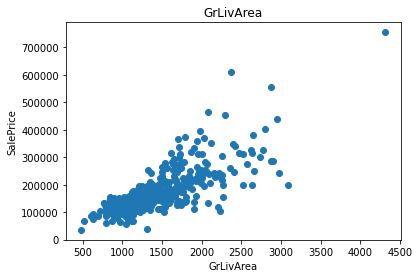

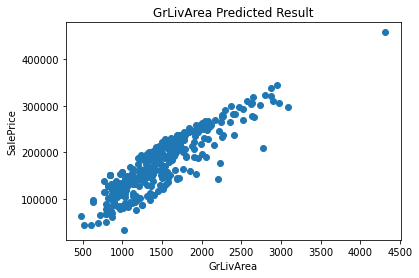

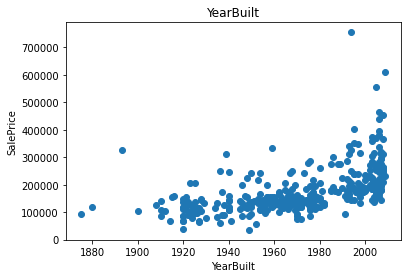

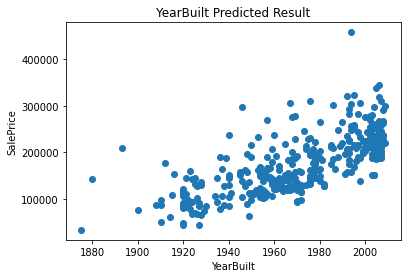

-----------------------------------------


In [18]:
# linear regression
reg = LinearRegression().fit(X_train_trans, y_train)

# prediction
reg_pred = reg.predict(X_test_trans)

# passing data into the outputing function
display_outputs('Linear Regression', reg_pred)

SVM
MSE: 3453423140.761644


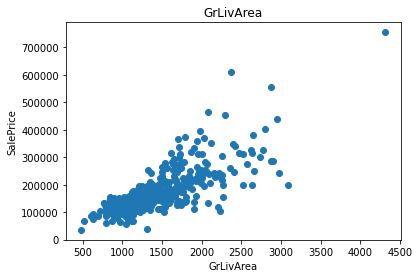

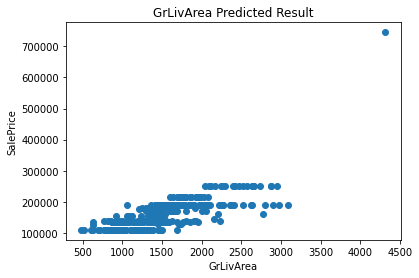

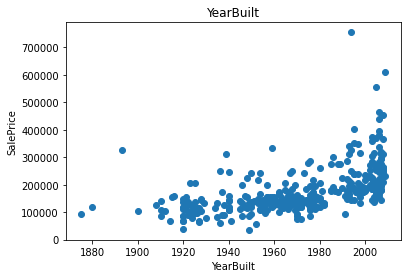

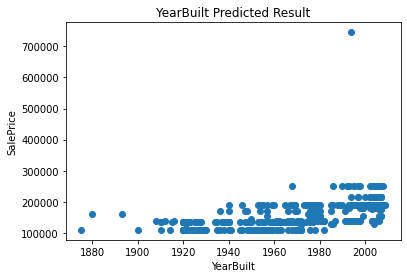

-----------------------------------------


In [19]:
# SVM
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# fitting
clf.fit(X_train_trans, y_train)

# prediction
clf_pred = clf.predict(X_test_trans)

# passing data into the outputing function
display_outputs('SVM', clf_pred)

Decision tree
MSE: 3105181495.8027396


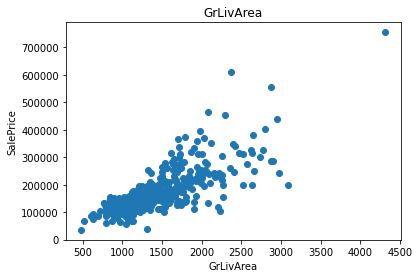

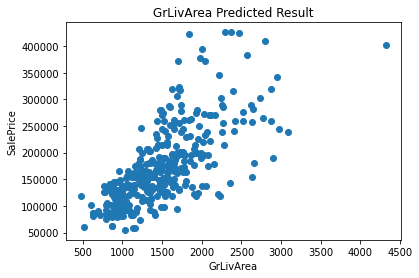

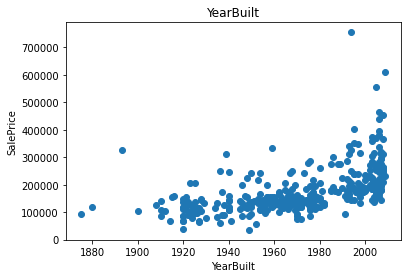

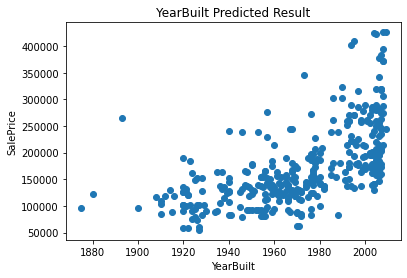

-----------------------------------------


In [20]:
# Decision tree
dTC = DecisionTreeClassifier(random_state=0)

# fitting
dTC.fit(X_train_trans, y_train)

# prediction
dTC_pred = dTC.predict(X_test_trans)

# passing data into the outputing function
display_outputs('Decision tree', dTC_pred)

Random Forest
MSE: 5201870599.665753


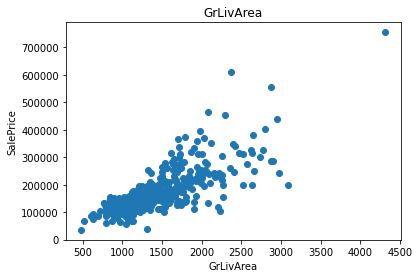

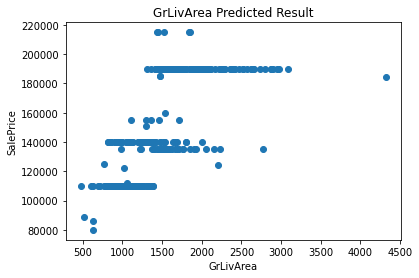

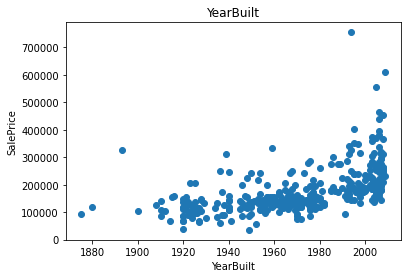

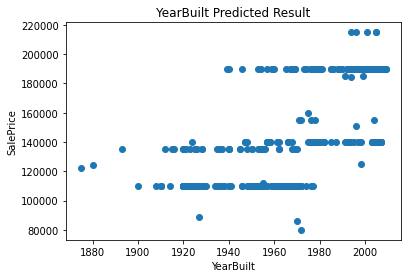

-----------------------------------------


In [21]:
# Random Forest
rFC = RandomForestClassifier(max_depth=2, random_state=0)

# fitting
rFC.fit(X_train_trans, y_train)

# prediction
rFC_pred = rFC.predict(X_test_trans)

# passing data into the outputing function
display_outputs('Random Forest', rFC_pred)

In [7]:
# putting the results in a table
pd.DataFrame(mSE_results, index=model_names, columns=['MSE'])

,MSE
Linear Regression,2.314465e+09
SVM,3.193384e+09
Decision tree,2.574251e+09
Random Forest,3.048039e+09


## Problem 4

In [8]:
pd_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Using 4 features are GrLivArea, YearBuilt, LotArea, YrSold

In [9]:
# adding other features to the variable to be used
target_variable = pd_train[["GrLivArea","YearBuilt", "SalePrice", "LotArea", "YrSold"]]

# dividing them into different variables
X = target_variable.loc[:, ["GrLivArea","YearBuilt", "LotArea", "YrSold"]]
y = target_variable["SalePrice"]

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# standardizing the data
scaler = StandardScaler()

# fitting
scaler.fit(X_train)

# transforming
X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

# fitting
reg = LinearRegression().fit(X_train_trans, y_train)

# prediction
reg_pred = reg.predict(X_test_trans)

# calculating and displaying the MSE
print("MSE:", mean_squared_error(y_true=y_test, y_pred=reg_pred))

MSE: 2272782613.19264
